# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#import libraries to be used
import pandas as pd
import numpy as np
import requests
import os
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load WeRateDogs twitter archive data

twt_archive = pd.read_csv('twitter-archive-enhanced.csv')
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#using requests library to download and read image predictions dataset

folder_name = 'data wrangling'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url= ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
img_predict = pd.read_csv('data wrangling/image-predictions.tsv', sep= '\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#using json library to extract some columns from the twitter api 


df = []
with open('tweet-json.txt', encoding='utf-8') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
twt_api=pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# 1. Assessment  of twitter archive data set

Under this section both visual and programatic asesssment of the twtitter_archive dataset will take place for both quality and tidiness issues

## 1a. Visual Assesment

In [6]:
# loading the twt_archive to visually assess quality issues
twt_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


  > Issues: 
      
      1.Some columns(name,doggo,floofer,pupper,puppo) null values were entered as 'None' instead of NaN
      2.The rating_denominator column is not uniform with 10 as its value, e.g index 2335 has 2 is instead of 10,
      3.The name column containes names like a, an, the
      4.The dog stages(doggo,floofer,pupper,puppo) should be in a column and be attributes to each obseravtion(dog tweeted            about)

## 1b. programmatic assessment 

In [7]:
# check the numbers of rows and columns
twt_archive.shape

(2356, 17)

In [8]:
#check basic information about column data types,and columns with missing data
twt_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

>Issues:
       
      1. wrong datatypes:
          A. tweet_id,in_reply_to_status_id,retweeted_status_id,in_reply_to_user_id ,retweeted_status_user_id , in numerical datatypes instead of object data type 
          B. timestamp ,retweeted_status_timestamp in object instaed of datetime
      2.Expanded_urls has missing data;2297 instead of2356
      3. we are only interested in original tweets however, there are 181 retweeted tweets and 78 replies

In [9]:
twt_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

>issues:
some of the ratings are not over 10

In [10]:
# check for duplicated value in columns that are suppose to be unique such as tweet_id, the url to each tweet
twt_archive[twt_archive.tweet_id.duplicated()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


No issues

In [11]:
twt_archive.expanded_urls.duplicated().sum()

137

In [12]:
twt_archive[twt_archive.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


>Issue:
        
        1. There are 137 duplicated rows by expnaded_urls

In [13]:
#check the name column for unusal names
twt_archive.name.value_counts()
   

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Toby            7
Daisy           7
Bailey          7
Buddy           7
an              7
Jack            6
Rusty           6
Scout           6
Bella           6
Koda            6
Oscar           6
Leo             6
Dave            6
Stanley         6
Milo            6
Jax             6
Finn            5
             ... 
Carter          1
Brownie         1
Sprout          1
Olaf            1
Yoda            1
Chaz            1
Jo              1
Banditt         1
Iroh            1
Ralphson        1
Henry           1
Snickers        1
Newt            1
Crimson         1
Eevee           1
Flurpson        1
Maude           1
Bubba           1
Leonard         1
Beemo           1
Brooks          1
Ed              1
officially      1
Bode            1
Brandonald

> The name column has 55 entries as 'a',745 entries as 'none' instaed of NaN, 8 entries as 'the', 7 enteries as 'an'

# 2. Assessment of the Image Prediction dataset

## 2a. Visual Assessment

In [14]:
#load the image prediction dataframe
img_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


> Issues
1. some of the images in are not images of dogs as column P1_dogs shows false which is corroborated by column P1 which states what they are e.g index 6 is a box turtle

## 2b.Programmatic assessment

In [15]:
img_predict.shape

(2075, 12)

In [16]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> Issue
1. the tweet_id column here is  set as int instead of object.

In [17]:
#check for images that are not dog images
img_predict[(img_predict.p1_dog== False )& (img_predict.p2_dog== False)& (img_predict.p3_dog==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


> issue; there are 324 items that are not pictures of dogs

In [18]:
#check for duplicated images
img_predict[img_predict.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


> Issues:
     1.There as 66 duplicated images. i will dive in further to see if they have the same tweet ID or different tweet Id
     2.Some of the images are not pictures of dogs
     3.one of P1,P2,P3 can be selected based on the highest confidence interval

In [19]:
#Randomly check a duplicated jpg url to assess if they have the same contents across all the columns to make sure dropping them isnt a bad decison
img_predict[img_predict['jpg_url']=='https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


# 3. Twitter Api dataset

## 3a. Visual assessment

In [20]:
#load dataframe gotten fron twitter Api
twt_api


,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017


## 3b. Programatic assessment

In [21]:
twt_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


> Issues
     1.Tweet_Id is also in int
     2.create_date should be in datetime not object

### Quality issues
    1. visually, columns such as name,doggo,floofer,pupper,puppo null values were entered as 'None' instead of NaN

    2.visually at index 2335, the rating denominator is 2 as against a uniform 10, 

    3. duplicate enteries for expanded_url columns

    4.the name column containes names like a, an, the,none

    5.wrong datatypes: 1. tweet_id in,n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id in int instead of object
                 2. timestamp in object instaed of datetime

    6.some of the images in are not images of dogs as column P1_dogs shows false which is corroborated by column P1 which states what they are e.g index 6 is a box turtle

    7.There as 66 duplicated jpg_url in the image prediction dataframe each containing the same information as its duplicates

    8.create_date should be in datetime not object in the twitter api dataframe

### Tidiness issues
1.In the tweet archive dataframe, The dog stages(doggo,floofer,pupper,puppo) should be in a column and be attributes to each 
observation(dog tweeted about)

2.For the analysis only original tweets are needed from the Twitter archive dataset,so we do not need the retweet and reply columns

3.one of P1,P2,P3 can be selected based on the highest confidence interval as a dog type

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
archive_clean= twt_archive.copy()
img_clean= img_predict.copy()
api_clean= twt_api.copy()

### Issue1 : columns such as name,doggo,floofer,pupper,puppo null values were entered as 'None' instead of NaN

#### Define: change entries in the columns from none to NaN using numpy

#### Code

In [23]:
columns = ['name','doggo','floofer','pupper','puppo']

for i in columns:
    archive_clean[i].replace('None', np.NAN, inplace =True)

#### Test

In [24]:
archive_clean.puppo

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12      puppo
13        NaN
14      puppo
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
2326      NaN
2327      NaN
2328      NaN
2329      NaN
2330      NaN
2331      NaN
2332      NaN
2333      NaN
2334      NaN
2335      NaN
2336      NaN
2337      NaN
2338      NaN
2339      NaN
2340      NaN
2341      NaN
2342      NaN
2343      NaN
2344      NaN
2345      NaN
2346      NaN
2347      NaN
2348      NaN
2349      NaN
2350      NaN
2351      NaN
2352      NaN
2353      NaN
2354      NaN
2355      NaN
Name: puppo, Length: 2356, dtype: object

### Issue2: the denominators are not uniform. for example, at index 2335, the rating denominator is 2 as against a uniform 10, 

#### Define; change all the value in the denominator to 10

#### Code

In [25]:
archive_clean.rating_denominator = 10

#### Test

In [26]:
archive_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

## Issue 3: duplicated entries for some values in the expanded url columns


### Define:  Drop rows that have multiple entries for expanded url columns

### Code

In [27]:
archive_clean.drop_duplicates(subset='expanded_urls', inplace=True)

### Test

In [28]:
archive_clean[archive_clean.expanded_urls.duplicated()].sum()

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

## Issue4: the name column containes names like a, an, the,none

### Define: replace 'a', 'an','the','his' with 'NaN'

### code

In [29]:
wrong_names= ['a','an','the','his','very']
for wrong_name in wrong_names:
    archive_clean['name'].replace(wrong_name, np.NAN, inplace =True)



### Test

In [30]:
archive_clean.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Penny         10
Tucker        10
Cooper        10
Lola           9
Sadie          8
Winston        8
Bo             8
Daisy          7
Toby           7
Bailey         7
Rusty          6
Koda           6
Oscar          6
Milo           6
Stanley        6
Scout          6
Dave           6
Jax            6
Bella          6
Louis          5
Bentley        5
Buddy          5
Leo            5
Larry          5
Chester        5
Alfie          5
Jerry          4
              ..
Blu            1
Linus          1
Hall           1
Carter         1
Beemo          1
Humphrey       1
Ivar           1
Pinot          1
Cilantro       1
DonDon         1
Jeb            1
Orion          1
Ralphson       1
Henry          1
Snickers       1
Newt           1
Crimson        1
Eevee          1
Flurpson       1
Maude          1
Bubba          1
Iroh           1
Leonard        1
Brooks         1
Ed             1
officially     1
Bode           1
Brandonald    

# Issue5; wrong datatypes: 1. tweet_id (in all the dataframes),in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id in int instead of object
                 2. timestamp in object instead of datetime


### Define: convert tweet_id in,n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id from int to object

### Code

In [31]:
wrong_dtypes= ['tweet_id' ,'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
for wrong_dtype in wrong_dtypes:
    archive_clean[wrong_dtype] = archive_clean[wrong_dtype].astype(object)
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
img_clean['tweet_id'] = img_clean['tweet_id'].astype(object)
api_clean['tweet_id'] = api_clean['tweet_id'].astype(object)

### Test

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2219 non-null object
in_reply_to_status_id         24 non-null object
in_reply_to_user_id           24 non-null object
timestamp                     2219 non-null datetime64[ns]
source                        2219 non-null object
text                          2219 non-null object
retweeted_status_id           180 non-null object
retweeted_status_user_id      180 non-null object
retweeted_status_timestamp    180 non-null object
expanded_urls                 2218 non-null object
rating_numerator              2219 non-null int64
rating_denominator            2219 non-null int64
name                          1476 non-null object
doggo                         90 non-null object
floofer                       10 non-null object
pupper                        244 non-null object
puppo                         26 non-null object
dtypes: datetime64[ns](1), int64(2

## Issue6: some of the images in are not images of dogs as column P1_dogs shows false which is corroborated by column P1 which states what they are e.g index 6 is a box turtle

### Define: Drop rows that do not contain dog pictures

### Code

In [33]:
img_clean.drop(img_clean[(img_clean.p1_dog== False )& (img_clean.p2_dog== False)& (img_clean.p3_dog==False)].index, inplace=True)

### Test

In [34]:
img_clean[(img_clean.p1_dog== False )& (img_clean.p2_dog== False)& (img_clean.p3_dog==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Issue7: There as 66 duplicated jpg_url in the image prediction dataframe each containing the same information as its duplicates


### Define : drop rows that contain duplicate jpg Urls

### Code

In [35]:
img_clean.drop_duplicates(subset= 'jpg_url', inplace=True)

### Test

In [36]:
img_clean[img_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Issue8: Create date in the twitter api data frame should be in datetime

### Define: change datatype to datetime

### Code

In [37]:
api_clean.create_date = pd.to_datetime(api_clean.create_date)

### Test

In [38]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 73.6+ KB


# cleaning Tidiness Issues

## Issue1: n the tweet archive dataframe, The dog stages(doggo,floofer,pupper,puppo) should be in a column and be attributes to each observation(dog tweeted about)

### Define: Melt the four dog columns(doggo, floofer, pupper and puppo) into a column called stages and change datatype to category

### Code

In [39]:
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source','text','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator','name'],
                         value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name='dog_stages', value_name='stage')

archive_clean= archive_clean.sort_values('stage').drop_duplicates('tweet_id', keep = 'first')
print(archive_clean.stage.value_counts())


pupper     232
doggo       90
puppo       25
floofer      9
Name: stage, dtype: int64


In [40]:
archive_clean.stage = archive_clean.stage.astype("category")

### Test

In [41]:
archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,stage
1221,706901761596989440,NaN,NaN,2016-03-07 17:58:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,doggo,NaN
2065,668872652652679168,NaN,NaN,2015-11-23 19:24:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Amélie. She is a confident white colle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668872652...,11,10,Amélie,doggo,NaN
1528,684188786104872960,NaN,NaN,2016-01-05 01:44:52,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684188786...,10,10,NaN,doggo,NaN
1970,670733412878163972,NaN,NaN,2015-11-28 22:38:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a great listener. Low main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670733412...,8,10,Jerry,doggo,NaN
1599,680440374763077632,NaN,NaN,2015-12-25 17:30:01,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680440374...,11,10,NaN,doggo,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo
948,745057283344719872,NaN,NaN,2016-06-21 00:54:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's downright gorgeous as hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745057283...,12,10,Oliver,doggo,NaN
627,788070120937619456,NaN,NaN,2016-10-17 17:32:13,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.61005e+17,4.19698e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,doggo,NaN
1860,672884426393653248,NaN,NaN,2015-12-04 21:05:23,"<a href=""http://twitter.com/download/iphone"" r...",Marvelous dog here. Rad ears. Not very soft. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672884426...,6,10,NaN,doggo,NaN
2096,668268907921326080,NaN,NaN,2015-11-22 03:24:58,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668268907...,10,10,NaN,doggo,NaN


### Issue 2:For the analysis only original tweets are needed from the Twitter archive dataset,so we do not need the retweet and reply columns

### Define : drop columns with retweet and reply data.(this is a mixture of quality and tidiness issue)
 NOTE: this has to be step wise, so we dont have tweets that has retweet data
        1. first remove rows that have retweet data i.e not null in the following columns  'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
        2. remove rows that have reply data i.e not null in the following columns 'in_reply_to_status_id', 'in_reply_to_user_id'
        3. drop the 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

In [42]:
#extract dataframe that has no retweet or reply data to get original tweet
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]
# test if the dataframe now contains 0 non null value for retweet and reply data
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 9 to 2218
Data columns (total 15 columns):
tweet_id                      2015 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     2015 non-null datetime64[ns]
source                        2015 non-null object
text                          2015 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2015 non-null object
rating_numerator              2015 non-null int64
rating_denominator            2015 non-null int64
name                          1361 non-null object
dog_stages                    2015 non-null object
stage                         317 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(11)
memory usage: 238.3+ KB


In [43]:
# drop retweet and reply data colums
archive_clean=archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

### Test

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 9 to 2218
Data columns (total 10 columns):
tweet_id              2015 non-null object
timestamp             2015 non-null datetime64[ns]
source                2015 non-null object
text                  2015 non-null object
expanded_urls         2015 non-null object
rating_numerator      2015 non-null int64
rating_denominator    2015 non-null int64
name                  1361 non-null object
dog_stages            2015 non-null object
stage                 317 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(6)
memory usage: 159.6+ KB


## Issue3: one of the P1,p2,p3 columns can be picked as the dog type with  the highest confidence interval

### Define: using numpy select pick the dog type with the highest confidence interval and save into a new column

### Code

In [45]:
#using numpy select, set conditions if P1 is the greatest or P2 or P3
c1=(img_clean.p1_conf > img_clean.p2_conf )&(img_clean.p1_conf > img_clean.p3_conf )
c2=(img_clean.p2_conf > img_clean.p1_conf )&(img_clean.p2_conf > img_clean.p3_conf )
c3=(img_clean.p3_conf > img_clean.p2_conf )&(img_clean.p3_conf > img_clean.p1_conf )
conditions= [c1,c2,c3]

#  the array from which output element will be taken
dog_type= [img_clean['p1'],img_clean['p2'],img_clean['p3']]

# create a new column containing the cthe breed with the highest confidence interval
img_clean['dog_breed'] = np.select(conditions, dog_type)

# the array from which the confidence interval will be selcted from
confidence_level= [img_clean['p1_conf'],img_clean['p2_conf'],img_clean['p3_conf']]

# create a new column containing the highest confidence interval value
img_clean['confidence_interval'] = np.select(conditions, confidence_level)

#drop p1,p1_conf to P3_dog column
img_clean.drop(img_clean.iloc[:, 3:12], inplace=True, axis=1)

### Test

In [46]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id               1691 non-null object
jpg_url                1691 non-null object
img_num                1691 non-null int64
dog_breed              1691 non-null object
confidence_interval    1691 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 79.3+ KB


In [47]:
# Merge all dataframe together as Master_data
master_data =pd.merge(pd.merge(archive_clean,img_clean, how= 'inner', on ='tweet_id'), 
                                api_clean, how='inner', on= 'tweet_id')
master_data.info()
master_data.rating_numerator= master_data.rating_numerator.astype(object)
master_data.rating_denominator= master_data.rating_denominator.astype(object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 0 to 1597
Data columns (total 17 columns):
tweet_id               1598 non-null object
timestamp              1598 non-null datetime64[ns]
source                 1598 non-null object
text                   1598 non-null object
expanded_urls          1598 non-null object
rating_numerator       1598 non-null int64
rating_denominator     1598 non-null int64
name                   1154 non-null object
dog_stages             1598 non-null object
stage                  243 non-null category
jpg_url                1598 non-null object
img_num                1598 non-null int64
dog_breed              1598 non-null object
confidence_interval    1598 non-null float64
retweet_count          1598 non-null int64
favorite_count         1598 non-null int64
create_date            1598 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(1), int64(5), object(8)
memory usage: 214.0+ KB


In [50]:
#create date date time and timestamp are the same column so we drop ,also drop dog stages to avoid confusion
master_data.drop(['create_date','dog_stages'], axis=1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,dog_breed,confidence_interval,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,7711,32467
1,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,2173,6620
2,760893934457552897,2016-08-03 17:43:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Wishes. He has the day off. Daily stru...,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,doggo,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_spaniel,0.113992,1104,4228
3,775364825476165632,2016-09-12 16:05:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. He's an independent doggo stil...,https://twitter.com/dog_rates/status/775364825...,11,10,Finley,doggo,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,3472,8295
4,782747134529531904,2016-10-03 01:00:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Deacon. He's the happiest almost dry d...,https://twitter.com/dog_rates/status/782747134...,11,10,Deacon,doggo,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,0.560699,1604,8310
5,786363235746385920,2016-10-13 00:29:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo,doggo,https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg,1,golden_retriever,0.929266,4072,12189
6,795464331001561088,2016-11-07 03:14:10,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,27728,55683
7,796484825502875648,2016-11-09 22:49:15,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,https://twitter.com/dog_rates/status/796484825...,12,10,NaN,doggo,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,0.116924,2042,8472
8,799757965289017345,2016-11-18 23:35:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Sobe. She's a h*ckin happy doggo. Only...,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,doggo,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,1,Border_collie,0.442534,2506,9390
9,758828659922702336,2016-07-29 00:57:05,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,doggo,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048,4376,12376


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
master_data.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. What dog breed is the most liked
2. what dog stage is the most liked
3. What is the most common dog stage?

In [52]:
## Insight 1: What dog breed is the most liked

In [53]:
master_data.groupby('dog_breed').sum().sort_values('favorite_count', ascending=False)

,img_num,confidence_interval,retweet_count,favorite_count
dog_breed,,,,
golden_retriever,168,93.220610,446998,1529677
Labrador_retriever,104,59.294335,334634,1022919
Pembroke,105,60.347441,262858,943346
Chihuahua,97,45.392122,218403,667981
Samoyed,45,27.903967,161309,469993
chow,49,24.241619,111522,392738
pug,61,40.998049,99182,320223
cocker_spaniel,31,14.067545,69247,258203
malamute,36,17.094075,73819,249179


The golden Retriever is the dog breed with the highest number(1529677) of likes on twitter.

## Insight 2:what dog stage is the most liked

In [54]:
master_data.groupby('stage')['favorite_count'].sum()

stage
doggo      1116073
floofer      92442
pupper     1014026
puppo       437667
Name: favorite_count, dtype: int64

The most liked dog stage is doggo with cumulative of 1116073 likes

## Insight 3: What is the most common dog stage?

In [55]:
master_data.stage.value_counts()

pupper     156
doggo       61
puppo       19
floofer      7
Name: stage, dtype: int64

The most common dog stage is the Pupper stage, however it is not the most liked.

## Visualization

### From insight 1. it was decduced that the golden retriever is the most liked dog breed, using a bar_chart, i want to confirm it its has the highest retweet count thereby making it the dog breed that generated the most interactions(both likes and retweets)

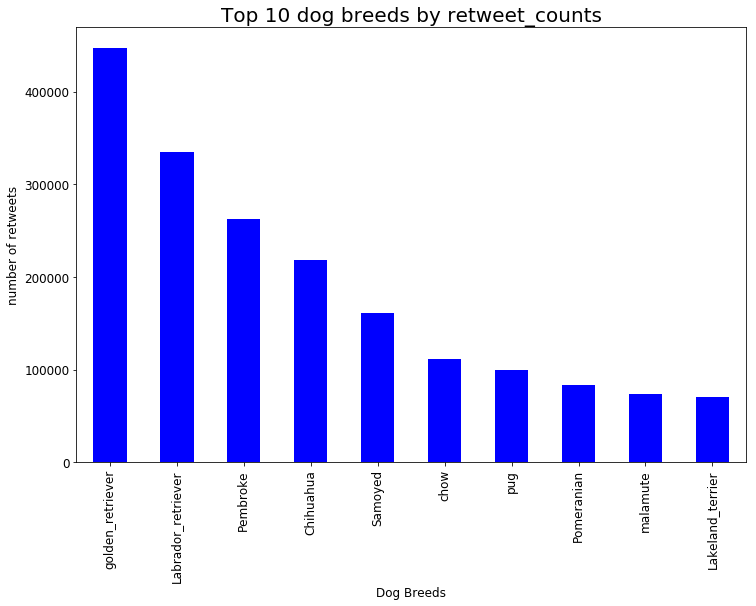

In [56]:
loved_breed = master_data.groupby('dog_breed')['retweet_count'].sum().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(12,8))
plt.title("Top 10 dog breeds by retweet_counts", size=20)
loved_breed.plot(kind='bar',fontsize=12,color='b')
plt.xlabel('Dog Breeds', fontsize=12)
plt.ylabel('number of retweets',fontsize=12)
sns.set_style("whitegrid");

From the visualization above, the golden Retreiver dogs has the highest retweet, therby making it the dog that generated the most interactions.